In [123]:
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
import numpy as np
import cv2

In [125]:
df=cv2.imread("IMG-20190217-WA0046.jpg")

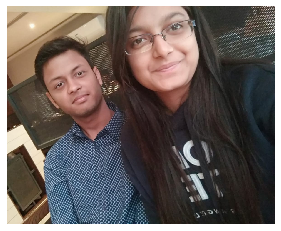

In [126]:

img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

In [127]:
img.shape

(959, 1180, 3)

In [128]:
img2=img.reshape(-1,3)

In [129]:
img2.shape

(1131620, 3)

In [130]:
from sklearn.cluster import KMeans

In [131]:
kmeans=KMeans(n_clusters=6)

In [132]:
kmeans.fit(img2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [133]:
center=np.array(kmeans.cluster_centers_
               )

In [134]:
print(center
     )

[[143.59095548 106.79304936  89.36039194]
 [ 38.40056062  34.99161463  34.8134044 ]
 [218.45330998 195.30678715 178.31470085]
 [ 64.89885759  84.90773235 106.72601308]
 [ 73.21149402  61.59503561  52.92861369]
 [171.98994923 150.58911397 145.59100282]]


In [135]:
#plot what all colors are

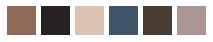

In [136]:
color=[]
for i,col in enumerate(center):
    plt.subplot(1,10,i+1)
    color.append(col)
    square=np.zeros((100,100,3),dtype="uint8")
    square[:,:,:]=col
    plt.imshow(square)
    plt.axis("off")
    
plt.show()

In [137]:
np.unique(kmeans.labels_,return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([105739, 459346, 125641,  93748, 231662, 115484]))

In [138]:

# Repaint the Original Image
labels = kmeans.labels_

In [139]:
new_img=np.zeros(img2.shape)

In [140]:
for ix in range(img2.shape[0]):
    new_img[ix] = color[labels[ix]]

print(new_img.shape)

(1131620, 3)


In [141]:
new_img=new_img.reshape(959,1180,3)


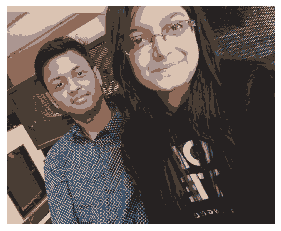

In [142]:
new_img = new_img/255
plt.imshow(new_img)
plt.axis("off")
plt.show()

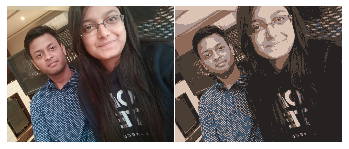

In [143]:
plt.imshow(np.hstack((img/255,np.ones((959,10,3)),new_img)))
plt.axis("off")
plt.show()
